# 
Topic and Trend analysis
Finding hidden themes in thousands of court decisions automatically

For example,:

If I read 9,000 cases, what are the MAIN things courts talk about again and again?

Why Topic Modeling is needed?

Imagine you open 9,000 PDF judgments.

You ask yourself that:

Are these mostly prison cases?

Human rights?

Property disputes?

Police violence?

A computer can help summarize themes without reading each file.

That is Topic Modeling.

So for that we used text column. This is the combined text we already created from

facts, silver_rationales and gold_rationales.

In [1]:
#import important libraries
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt


CountVectorizer used for Converts text into word counts.

LatentDirichletAllocation (LDA) - The algorithm that finds topics

**We use CountVectorizer, NOT TF-IDF here Why?**

Because, LDA is a probabilistic model and It works better with raw word counts

In [2]:
#load cleaned dataset from notebook 02.
import pandas as pd

df_train = pd.read_csv("/kaggle/input/preprocessed-dataset/df_train_cleaned.csv")

df_train.head(2)

,case_id,case_no,title,judgment_date,facts,applicants,defendants,allegedly_violated_articles,violated_articles,court_assessment_references,silver_rationales,gold_rationales,text,outcome,text_length,clean_text,clean_text_length
0,001-59587,25702/94,CASE OF K. AND T. v. FINLAND,2001-07-12,['11. At the beginning of the events relevant...,"['K.', 'T.']",['FINLAND'],"['13', '8']",['8'],"{'8': ['12', '140', '155', '156', '157', '158'...","[1, 13, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30...",[],['11. At the beginning of the events relevant...,0,6886,11 beginning event relevant application k daug...,3817
1,001-59591,42527/98,CASE OF PRINCE HANS-ADAM II OF LIECHTENSTEIN v...,2001-07-12,['9. The applicant is the monarch of Liechten...,['PRINCE HANS-ADAM II OF LIECHTENSTEIN'],['GERMANY'],"['14', 'P1-1', '6']",[],"{'6': ['12', '15', '24', '25', '26', '27', '28...","[3, 6]",[],['9. The applicant is the monarch of Liechten...,0,2747,9 applicant monarch liechtenstein born 1945 li...,1529


In [3]:
df_train['clean_text']



0       11 beginning event relevant application k daug...
1       9 applicant monarch liechtenstein born 1945 li...
2       9 june 1949 plot agricultural land owned appli...
3       8 1991 mr du slobodn k research worker field l...
4       9 applicant italian citizen born 1947 living o...
                              ...                        
8995    5 applicant born 1960 life village karakert ar...
8996    5 applicant born 1946 currently detention rege...
8997    5 applicant russian national material time liv...
8998    8 case applicant brought civil proceeding russ...
8999    4 applicant born 1971 life p c practising lawy...
Name: clean_text, Length: 9000, dtype: object

In [5]:
vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=10,
    stop_words='english'
)

dtm = vectorizer.fit_transform(df_train['clean_text'])


# Why this step?

Computers cannot read text.
They need numbers.

This creates:
Rows = cases
Columns = words
Values = word frequency.

max_df=0.95 : Ignore words in >95% documents (too common)
min_df=10 : Ignore rare words
stop_words : Remove useless words

In [7]:
#Train Topic Model (LDA)

lda_8 = LatentDirichletAllocation(
    n_components=8,
    random_state=42
)

lda_8.fit(dtm)  # make sure to fit the correct model
feature_names = vectorizer.get_feature_names_out()

def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):  # use components_ instead of n_components
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {', '.join(top_words)}")

print_topics(lda_8, feature_names)


Topic 0: article, law, act, case, right, state, public, mr, section, appeal
Topic 1: child, decision, authority, 2010, order, right, family, request, 2009, article
Topic 2: police, officer, prosecutor, mr, statement, criminal, report, public, investigation, witness
Topic 3: decision, judgment, company, proceeding, land, property, enforcement, administrative, appeal, december
Topic 4: detention, criminal, trial, appeal, case, decision, prosecutor, cell, regional, offence
Topic 5: medical, prison, hospital, treatment, health, condition, doctor, report, cell, care
Topic 6: appeal, proceeding, hearing, district, case, regional, decision, judgment, 2001, 2000
Topic 7: prosecutor, office, investigation, mr, military, district, criminal, case, investigator, 2003


Why LDA:

Latent Dirichlet Allocation finds hidden topics by grouping words that co-occur in documents.

Each topic is a distribution over words, and each document is a distribution over topics.

Why n_components=6,8 or 10:

I tested 6, 8, 10.

6 : Best interpretability, minimal overlap.

8 : More granular but some overlap.

10 : Too fragmented; one concept split into many topics.

If skipped: You wouldn’t discover topics; LDA is the core of your analysis.

In [8]:
#try with 6 components
lda_6 = LatentDirichletAllocation(
    n_components=6,
    random_state=42
)

lda_6.fit(dtm)
feature_names = vectorizer.get_feature_names_out()

def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {', '.join(top_words)}")

print("LDA with 6 topics:")
print_topics(lda_6, feature_names)


LDA with 6 topics:
Topic 0: article, law, right, state, act, case, mr, public, section, decision
Topic 1: prosecutor, office, mr, military, investigation, district, criminal, case, investigator, 2003
Topic 2: police, officer, prosecutor, mr, statement, report, criminal, public, taken, investigation
Topic 3: proceeding, judgment, decision, appeal, district, case, hearing, december, claim, march
Topic 4: detention, criminal, appeal, case, decision, trial, hearing, regional, district, proceeding
Topic 5: prison, medical, cell, child, hospital, treatment, condition, health, mother, doctor


In [9]:
# try with 10 component and find which component is better and then we give name to each topics so we undertsand graph easily
lda_10 = LatentDirichletAllocation(
    n_components=10,
    random_state=42
)

lda_10.fit(dtm)
feature_names = vectorizer.get_feature_names_out()

print("LDA with 10 topics:")
print_topics(lda_10, feature_names)


LDA with 10 topics:
Topic 0: article, law, state, right, mr, public, case, act, member, person
Topic 1: decision, 2010, authority, order, russian, request, 2009, article, 2011, extradition
Topic 2: police, officer, prosecutor, mr, statement, criminal, report, investigation, witness, public
Topic 3: judgment, land, decision, property, proceeding, enforcement, bailiff, plot, flat, december
Topic 4: detention, criminal, cell, trial, prison, appeal, case, regional, decision, offence
Topic 5: child, mother, family, father, parent, care, contact, report, social, home
Topic 6: hearing, proceeding, district, appeal, case, regional, judgment, decision, 2001, 2000
Topic 7: prosecutor, office, investigation, military, mr, district, criminal, case, investigator, 2003
Topic 8: medical, prison, hospital, treatment, doctor, health, examination, condition, 2009, complaint
Topic 9: company, decision, appeal, proceeding, constitutional, judgment, law, case, act, supreme


We experimented with 6, 8, and 10 topics. the 6 and 8 is good but 10 topics is bad to choose because one concept split into many topics. so,  The final model with 6 topics was selected due to better interpretability and reduced topic overlap. Topics were manually labeled based on their dominant keywords.

In [21]:
topic_labels = {
    0: "Legal Rights & Laws",
    1: "Prosecution & Investigations",
    2: "Police & Law Enforcement",
    3: "Court Proceedings & Appeals",
    4: "Detention & Trials",
    5: "Prison Conditions & Health"
}


Allows you to see the most important words for each topic.

Manual labeling: Based on these top words, you gave topics meaningful names.
If skipped: Topics would be just numbers (0–5), harder to interpret and visualize trends.

In [27]:
#df_train['dominant_topic'] = dominant_topics
#df_train["dominant_topic"]

In [28]:
#Assigning dominant topic to each case
doc_topics = lda_6.transform(dtm)
dominant_topics = doc_topics.argmax(axis=1)
doc_labels = [topic_labels[t] for t in dominant_topics]

# Example: show first 10 documents
for i, label in enumerate(doc_labels[:10]):
    print(f"Document {i}: {label}")

Document 0: Prison Conditions & Health
Document 1: Legal Rights & Laws
Document 2: Court Proceedings & Appeals
Document 3: Legal Rights & Laws
Document 4: Court Proceedings & Appeals
Document 5: Legal Rights & Laws
Document 6: Legal Rights & Laws
Document 7: Police & Law Enforcement
Document 8: Court Proceedings & Appeals
Document 9: Prison Conditions & Health


now yo can see each document has a theme.
doc_topics : Topic distribution for each document

argmax : Choose the topic with the highest weight (dominant topic)

doc_labels : Assign human-readable labels for visualization

If skipped: You cannot track which case belongs to which topic, so trend analysis is impossible.

In [29]:
#Topic trends over time
#Convert date:
df_train['judgment_date'] = pd.to_datetime(df_train['judgment_date'])
df_train['year'] = df_train['judgment_date'].dt.year


Convert dates to datetime : Extract year : Count documents per topic per year.

This creates a matrix: years vs topics, showing how each topic evolves over time.

If skipped: You cannot see trends, e.g., “Are prison cases increasing over years?”

In [30]:
#Count topics per year:
topic_trends = df_train.groupby(['year', 'dominant_topic']).size().unstack().fillna(0)


In [31]:
print(topic_trends.columns)


Index([0, 1, 2, 3, 4, 5], dtype='int64', name='dominant_topic')


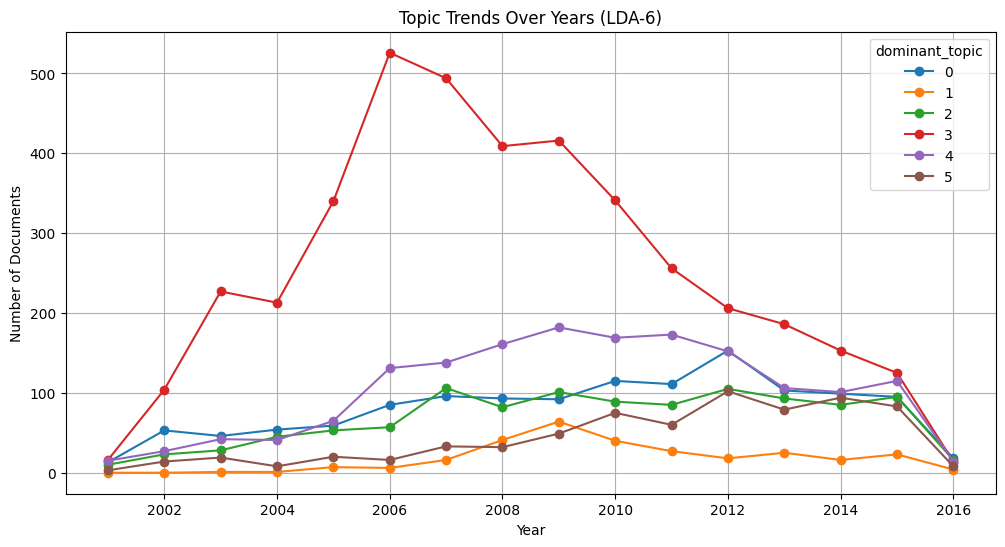

In [32]:
# Plot topic trends over time
topic_trends.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Topic Trends Over Years (LDA-6)")
plt.xlabel("Year")
plt.ylabel("Number of Documents")
plt.grid(True)
plt.show()




Visual representation makes interpretation easy.

Line charts clearly show increasing/decreasing topics over time.

If skipped: Trends would be invisible; tables alone are hard to interpret.

# lets try another model : BERTopic and Embedding model

In [33]:
!pip install bertopic sentence-transformers umap-learn hdbscan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.9 MB/s eta 0:00:00


In [34]:
texts = df_train['clean_text'].tolist()

In [35]:
# Upgrade BERTopic and dependencies to compatible versions
!pip install --upgrade bertopic
!pip install --upgrade umap-learn
!pip install scikit-learn==1.2.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 57.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
^C
  Preparing metadata (pyproject.toml) ... canceled
ERROR: Operation cancelled by user


In [37]:
import sklearn
import umap
import bertopic

In [38]:
#Import BERTopic and Embedding Model
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Use a multilingual/small model if needed
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [52]:
# Initialize BERTopic with embedding model
topic_model = BERTopic(embedding_model=embedding_model, 
                       calculate_probabilities=True,  # optional: gives probability per topic
                       verbose=True,
                       min_topic_size=20)

# Fit the model to your documents
topics, probabilities = topic_model.fit_transform(texts)


2026-01-07 18:52:11,153 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/282 [00:00<?, ?it/s]

2026-01-07 18:59:41,427 - BERTopic - Embedding - Completed ✓
2026-01-07 18:59:41,428 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2026-01-07 18:59:49,867 - BERTopic - Dimensionality - Completed ✓
2026-01-07 18:59:49,868 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-07 18:59:52,318 - BERTopic - Cluster - Completed ✓
2026-01-07 18:59:52,323 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-07 18:59:57,581 - BERTopic - Representation - Completed ✓


topics : List of dominant topic IDs for each document

probabilities : Probability distribution over topics for each document

✅ Advantages here over LDA:

Captures semantic meaning (e.g., “trial” in criminal vs civil contexts)

Finds cohesive clusters even if words differ

In [56]:
topic_model.reduce_topics(texts, nr_topics=20) #Merge similar topics
#Filter out outliers (-1) if you don’t want them in analysis:
df_train_filtered = df_train[df_train['bertopic_topic'] != -1]
# See top 10 topics
topic_info = topic_model.get_topic_info()
print(topic_info.head(10))

# View words in a specific topic (e.g., topic 0)
print(topic_model.get_topic(0))


2026-01-07 19:00:59,731 - BERTopic - Topic reduction - Reducing number of topics
2026-01-07 19:00:59,759 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-07 19:01:04,902 - BERTopic - Representation - Completed ✓
2026-01-07 19:01:04,907 - BERTopic - Topic reduction - Reduced number of topics from 75 to 20


   Topic  Count                                         Name  \
0     -1   3130               -1_applicant_court_appeal_case   
1      0   1762        0_court_applicant_judgment_proceeding   
2      1   1605           1_applicant_court_police_detention   
3      2    629  2_applicant_prosecutor_office_investigation   
4      3    459              3_land_property_applicant_court   
5      4    318               4_child_court_applicant_mother   
6      5    222           5_court_applicant_sofia_prosecutor   
7      6    165           6_tenant_possession_premise_notice   
8      7    145                7_tax_applicant_company_court   
9      8    132              8_zagreb_county_court_municipal   

                                      Representation  \
0  [applicant, court, appeal, case, decision, pro...   
1  [court, applicant, judgment, proceeding, distr...   
2  [applicant, court, police, detention, officer,...   
3  [applicant, prosecutor, office, investigation,...   
4  [land, prope

topic_info contains:

Topic ID, frequency, name/words

You can manually label topics based on top words, just like LDA:

In [57]:
#Assign Topics to Each Document
# Add dominant topic to dataframe
df_train['dominant_topic'] = topics

# Map human-readable labels if desired
df_train['topic_label'] = df_train['dominant_topic'].map(topic_labels)


In [58]:
# Convert dates and extract year
df_train['judgment_date'] = pd.to_datetime(df_train['judgment_date'])
df_train['year'] = df_train['judgment_date'].dt.year

# Count topics per year
topic_trends = df_train.groupby(['year', 'dominant_topic']).size().unstack().fillna(0)

# Optional: use labels for readability
topic_trends.columns = [topic_labels.get(t, f"Topic {t}") for t in topic_trends.columns]

# Display
print(topic_trends.head())


      Topic -1  Military & Investigations  Child & Family  \
year                                                        
2001      25.0                        0.0             0.0   
2002      71.0                        0.0             1.0   
2003      95.0                        2.0             0.0   
2004     109.0                        3.0             1.0   
2005     154.0                       37.0             7.0   

      Police & Law Enforcement  Court Proceedings & Appeals  \
year                                                          
2001                       0.0                          2.0   
2002                       1.0                          8.0   
2003                       4.0                         11.0   
2004                       6.0                         11.0   
2005                       2.0                         17.0   

      Detention & Prison  Immigration / Asylum  Topic 6  Topic 7  Topic 8  \
year                                                 

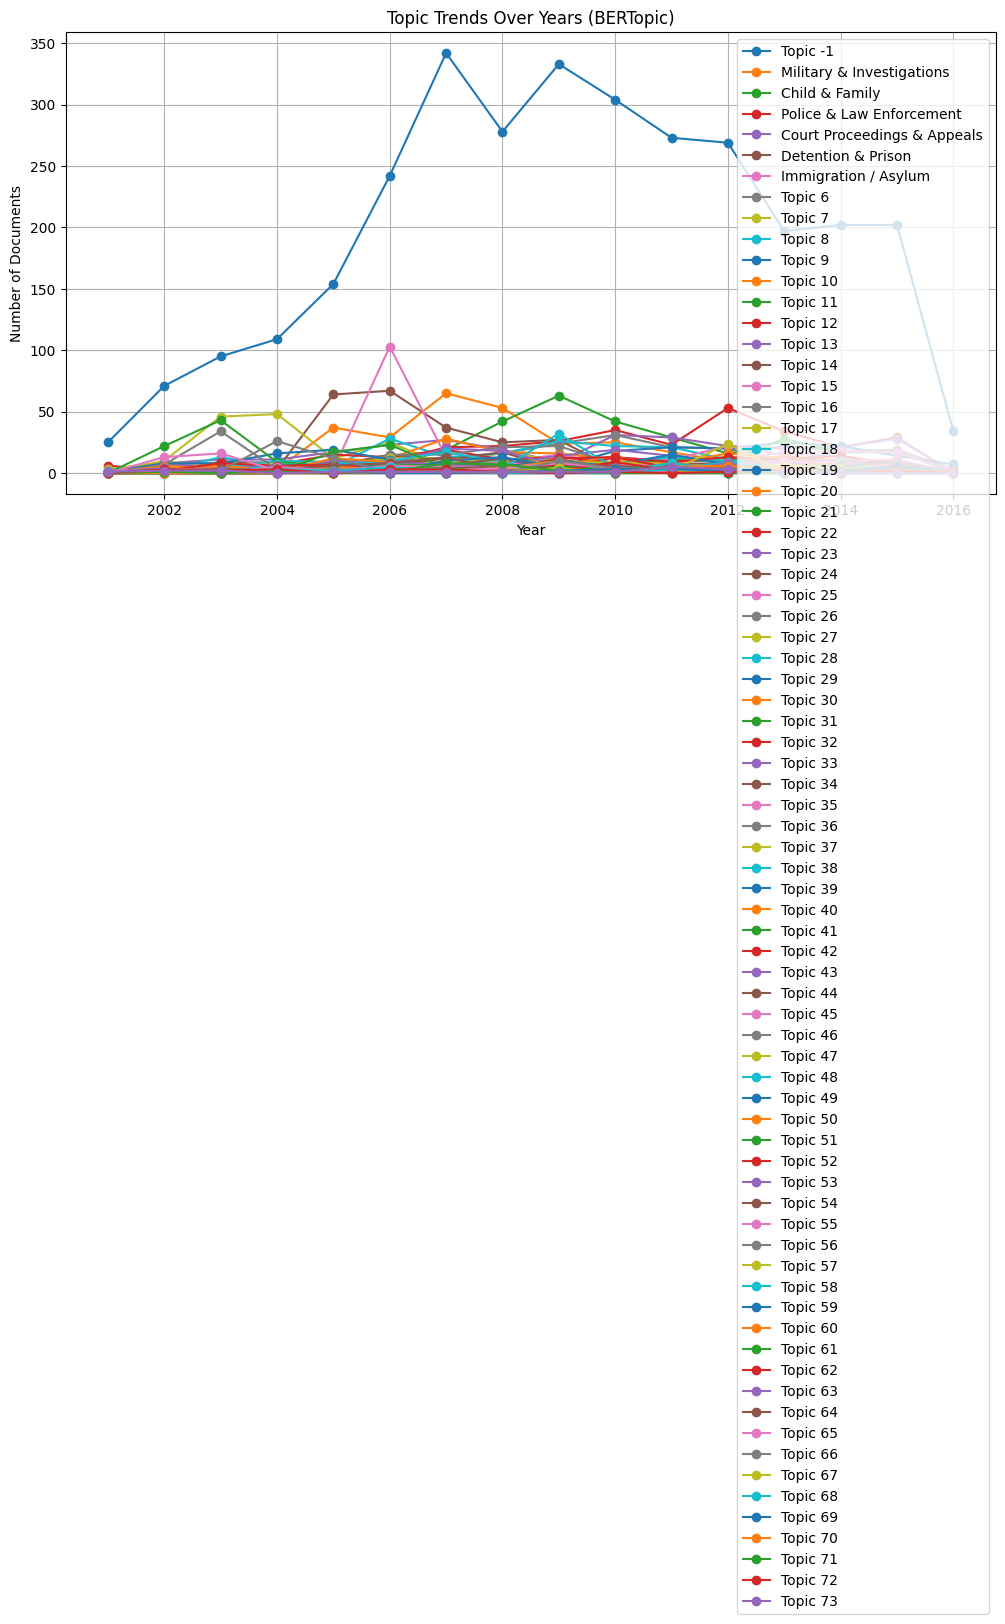

In [59]:
import matplotlib.pyplot as plt

topic_trends.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Topic Trends Over Years (BERTopic)")
plt.xlabel("Year")
plt.ylabel("Number of Documents")
plt.grid(True)
plt.show()
